In [16]:
# Orig. code at: https://codeberg.org/thpit/deterministic_bootstrapping/

# python 3 code
# Requires: numpy
# Optional: matplotlib

import sys
sys.path.append("ver2019")

import numpy as np
from ver2019.dbt import dbt
import matplotlib.pyplot as plt


In [17]:
# Get an instance of the DBT operator:
dbt1 = dbt()


In [6]:
n = 15
m = 15

# Values as seen in:
#  "A handbook of small data sets", D.J.Hand et al, 1994, 1st ed., Chapman Hill, pg 2. SK850 H236
# Format [i:j], j=0 (cross-fertilized), j=1 (self-fertilized), i = index of plant pair
heights = np.array([
    [23.5,17.4],
    [12.0,20.4],
    [21.0,20.0],
    [22.0,20.0],
    [19.1,18.4],
    [21.5,18.6],
    [22.1,18.6],
    [20.4,15.3],
    [18.3,16.5],
    [21.6,18.0],
    [23.3,16.3],
    [21.0,18.0],
    [22.1,12.8],
    [23.0,15.5],
    [12.0,18.0]])

X = heights[:,0] - heights[:,1]
Xc = X - np.mean(X)

# Equally weighted samples:
a = np.ones(m)/m;



In [7]:
# Or alternatively using the data as quoted in Fisher's DOE:
# (vals in inches)
heights = np.array([
    [23.5,17.375],
    [12.0,20.375],
    [21.0,20.0],
    [22.0,20.0],
    [19.125,18.375],
    [21.5,18.625],
    [22.125,18.625],
    [20.375,15.25],
    [18.25,16.5],
    [21.625,18.0],
    [23.25,16.25],
    [21.0,18.0],
    [22.125,12.75],
    [23.0,15.5],
    [12.0,18.0]
])
#X = np.array([49, -67, 8, 16, 6, 23, 28, 41, 14, 29, 56, 24, 75, 60, -48]) / 8
X = heights[:,0] - heights[:,1]
Xc = X - np.mean(X)

a = np.ones(m)/m;
print(X*8)

[ 49. -67.   8.  16.   6.  23.  28.  41.  14.  29.  56.  24.  75.  60.
 -48.]


In [8]:
n = len(X);
print('mean(X):                 {0}'.format(np.mean(X)));
print('emp. var(X):             {0}'.format(sum(Xc*Xc)/(n-1)));
print('std err(X):              {0}'.format(np.sqrt(sum(Xc*Xc)/(n-1))));
print('var(X) div n times a^2:  {0}'.format(sum(Xc*Xc)/n*sum(np.array(a)*np.array(a))));


mean(X):                 2.6166666666666667
emp. var(X):             22.259970238095235
std err(X):              4.718047290786225
var(X) div n times a^2:  1.3850648148148146


In [9]:
N = 1000;
[f_Z, z_vals] = dbt1.dbt_density(X, a, N);


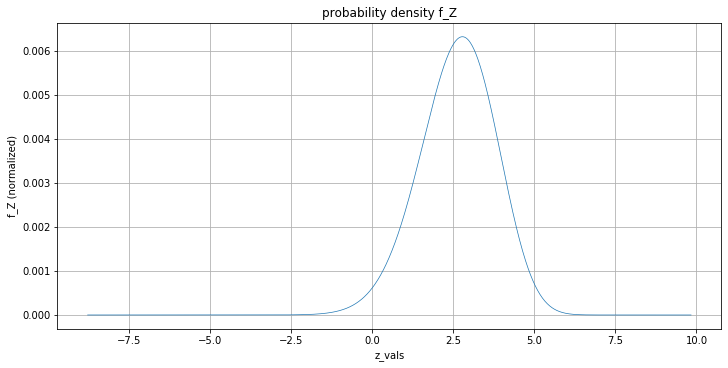

In [11]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(z_vals, f_Z, lw=0.7)
ax.set_xlabel('z_vals')
ax.set_ylabel('f_Z (normalized)')
ax.set_title('probability density f_Z')
plt.grid(True)
plt.show()

#plt.tight_layout()

In [12]:
print(dbt1.dbt_get_expectation(f_Z, z_vals))
print(dbt1.dbt_get_variance_div_N(f_Z, z_vals))

2.6166666666666543
1.3850937611820435


In [13]:
F_Z = dbt1.dbt_get_cdf_monotonous(f_Z)

In [14]:
print(len(F_Z))
print(F_Z[850:999])

1000
[0.99999843 0.99999861 0.99999877 0.99999892 0.99999904 0.99999916
 0.99999926 0.99999934 0.99999942 0.99999949 0.99999955 0.99999961
 0.99999966 0.9999997  0.99999974 0.99999977 0.9999998  0.99999983
 0.99999985 0.99999987 0.99999988 0.9999999  0.99999991 0.99999992
 0.99999993 0.99999994 0.99999995 0.99999996 0.99999996 0.99999997
 0.99999997 0.99999998 0.99999998 0.99999998 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.

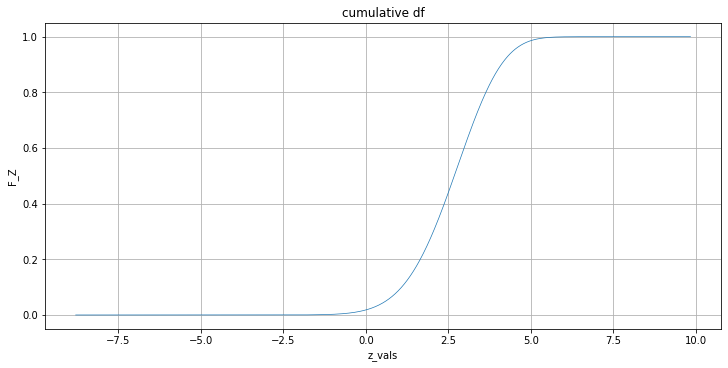

In [15]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(z_vals, F_Z, lw=0.7)
ax.set_xlabel('z_vals')
ax.set_ylabel('F_Z')
ax.set_title('cumulative df')
plt.grid(True)
plt.show()

# see pdf for a discussion on interpretability of the below graph